In [ ]:
# Woolworth Deutschland
# 2009 Insolvenzverfahren eröffnet; Ab 2010/2011 Geschäftsjahr vom Anfang Mai bis Ende April des nachfolgenden Jahres.
# 2010/2011 Rumpfgeschäftsjahr vom 18.05.2010 bis zum 30.04.2011.
# Juli 2010 Ende des Insolvenzverfahrens.
# Haupteigentümer sind seit dem 1. Juli 2010 zu 58,5 Prozent die B.H. Holding und zu 30 Prozent die Tengelmann-Gruppe.


In [1]:
# import libraries
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_colwidth', 200)
%matplotlib inline

In [2]:
# load the file with Discounter List
data = pd.read_csv('Woolworth.csv')
#data = pd.read_excel('Einzelhandel.xlsx', sheet_name='Woolworth', header=None,index_col=False)


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     14 non-null     object 
 1   Umsatz Tedi DE           14 non-null     int64  
 2   Umsatz Action EU         11 non-null     float64
 3   Umsatz Woolworth DE      14 non-null     int64  
 4   Kaufhäuser Woolworth DE  14 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 692.0+ bytes


In [4]:
data

,Year,Umsatz Tedi DE,Umsatz Action EU,Umsatz Woolworth DE,Kaufhäuser Woolworth DE
0,2010/2011,100,NaN,257,174
1,2011/2012,403,NaN,274,200
2,2012/2013,436,NaN,283,231
3,2013/2014,466,1506.0,294,260
4,2014/2015,502,1995.0,305,275
5,2015/2016,551,2675.0,332,297
6,2016/2017,628,3418.0,384,314
7,2017/2018,785,4216.0,433,348
8,2018/2019,875,5114.0,471,381
9,2019/2020,927,5569.0,478,424


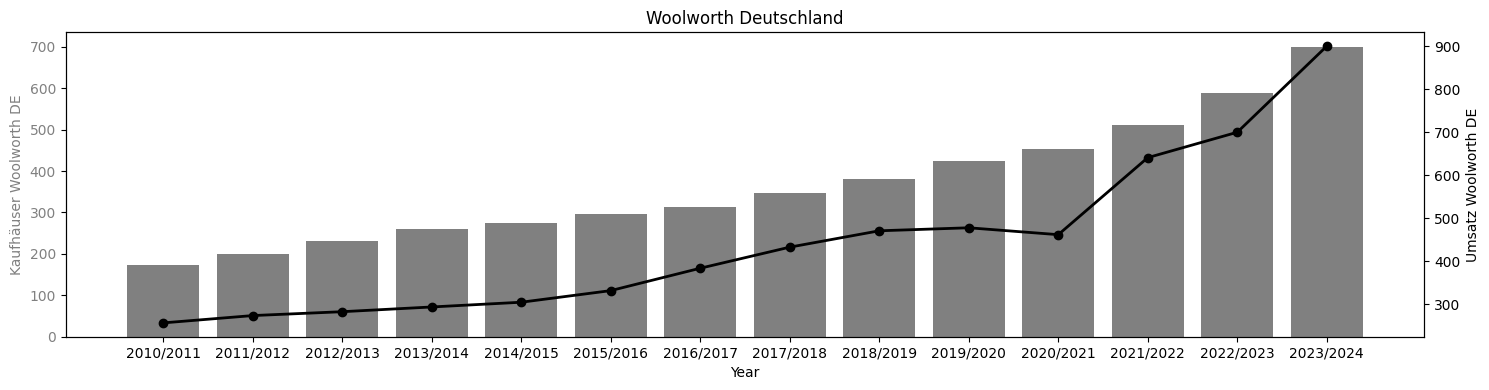

In [5]:
# Create figure and a main axis object
fig, ax1 = plt.subplots(figsize=(15, 4))

# Plot the bar chart on the primary axis (ax1)
ax1.bar(data["Year"], data["Kaufhäuser Woolworth DE"], color='grey', label='Bar Data (Primary)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Kaufhäuser Woolworth DE', color='grey')
ax1.tick_params(axis='y', labelcolor='grey')

# Create a secondary axis object that shares the same x-axis
ax2 = ax1.twinx()

# Plot the line chart on the secondary axis (ax2)
# 'ax1.get_xticks()' is used to align the line data points with the center of the bars
ax2.plot(ax1.get_xticks(), data["Umsatz Woolworth DE"], color='black', marker='o', linestyle='-', linewidth=2, label='Line Data (Secondary)')
ax2.set_ylabel('Umsatz Woolworth DE', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Add a title and show the plot
plt.title('Woolworth Deutschland')
fig.tight_layout() # Ensures labels don't get clipped

plt.show()


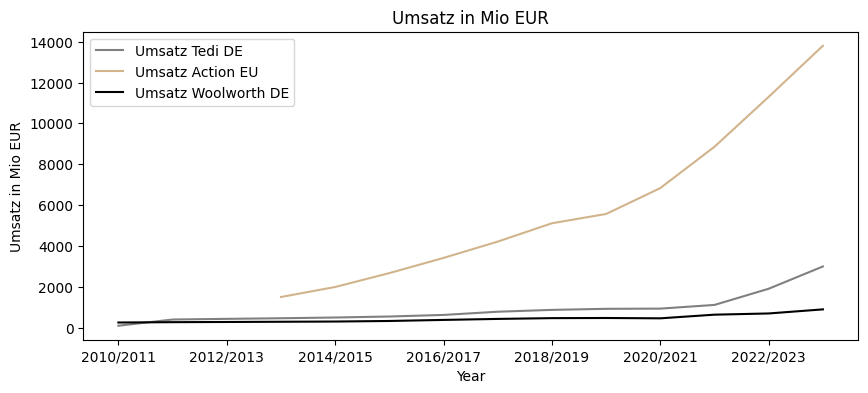

In [13]:
# plot lines
data.plot(x='Year', y=['Umsatz Tedi DE', 'Umsatz Action EU', 'Umsatz Woolworth DE'], figsize=(10,4), color=['grey', 'tan','black'])

# Set the x-axis label
plt.xlabel('Year')

# Set the y-axis label
plt.ylabel('Umsatz in Mio EUR')

# Set the title of the plot
plt.title('Umsatz in Mio EUR')

# Display the plot
plt.show()

In [ ]:
# https://www.handelsdaten.de/
# https://de.statista.com/